# Deep Neural Network pour la classification d'Image 

On va utiliser tout ce qu'on a appris dans l'exercice précédent pour construire un réseaux de neurones profond et l'appliquer à la classification d'image pour reconnaître une catégorie de fleur vs une autre, en espérant avoir une meilleure performance qu'avec la régression logistique.


**Après cet exercice vous saurez**
- Construire un réseau de neurones profonds dense pour la classification

## 1 - Packages ##

Import des packages nécessaires
- [numpy](www.numpy.org)
- [h5py](http://www.h5py.org)
- [matplotlib](http://matplotlib.org) 
- [PIL](http://www.pythonware.com/products/pil/)
- [scipy](https://www.scipy.org/) 
- [pandas](https://pandas.pydata.org/)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

## 2 - Présentation globale du problème

Télécharger le data set au lien :

http://www.robots.ox.ac.uk/~vgg/data/flowers/

**Hypothèses**:
Le dossier contient :
    - des images en jpg de tailles différentes
    - 17 catégories de fleurs

In [2]:
# Création de la matrice des images 
def create_data(path):
    """
    Crée un array contenant les valeurs RGB de chaque pixel et un array contenant les catégories
    Argument:
    - path chemin contenant le fichier téléchargé ci-dessus
    Ouput:
    - X coordonnées RGB de l'image resizée
    - Y catégorie de l'image
    """
    
    ### Images
    new_width  = 64
    new_height = 64
    with open(path+'/files.txt') as f:
        filenames=f.readlines()
    n_files = 160
    X = np.zeros((n_files,new_width, new_width, 3),dtype=int)
    for i,f in enumerate(filenames):
        if i in set(np.arange(881,960)):
                img = Image.open(path+'/'+f.rstrip())
                img = img.resize((new_width, new_height), Image.ANTIALIAS)
                rgb = np.array(img).astype(int)
                X[i-881,:,:,:] = rgb
        if i in set(np.arange(1121,1200)):
                img = Image.open(path+'/'+f.rstrip())
                img = img.resize((new_width, new_height), Image.ANTIALIAS)
                rgb = np.array(img).astype(int)
                X[i-1121+80,:,:,:] = rgb
        else:
            continue

     
    ### Labels
    Y=np.zeros(X.shape[0],dtype=int)
    #thresholds = np.arange(0,X.shape[0],80)
    #for i,s in enumerate(thresholds[:-1]):
    #    Y[s:thresholds[i+1]]=i
    #Y[thresholds[-1]:]= i+1
    Y[80:]=1
    
    sample = np.arange(80,X.shape[0])
    np.random.shuffle(sample)
    #X[80:160,:,:,:]=X[sample[:80],:,:,:]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    onehot_encoder = OneHotEncoder(sparse=False)
    
    Y_train = Y_train.reshape(len(Y_train), 1)
    Y_train = onehot_encoder.fit_transform(Y_train).astype(int)
    Y_train = Y_train[:,1].reshape(1,Y_train.shape[0])
    
    Y_test = Y_test.reshape(len(Y_test), 1)
    Y_test = onehot_encoder.fit_transform(Y_test).astype(int)
    Y_test = Y_test[:,1].reshape(1,Y_test.shape[0])

    classes = np.array([b'dendelion', b'buttercup'], 
      dtype='|S13')
    return(X_train, X_test, Y_train, Y_test, classes)

In [3]:
X_train, X_test, Y_train, Y_test, classes = create_data('flower')

## 2 - Dataset

On va utiliser le même dataset construit ci-dessus "buttercup vs dendelion" que pour la régression logistique. Le modèle qu'on avait construit atteignait 71.85% d'accuracy dans la classification. On espère trouver une meilleure performance ici.


y = 1 c'est une buttercup


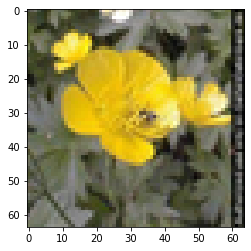

In [4]:
# Exemple d'image
index = 31
plt.imshow(X_train[index])
print ("y = " + str(np.squeeze(Y_train[:,index])) + " c'est une " + classes[int(np.squeeze(Y_train[:,index]))].decode("utf-8"))

**Exercice** Afficher les valeurs suivantes:
    - m_train (taille de l'échantillon train)
    - m_test (taille de l'échantillon test)
    - num_px (nombre de pixel d'un côté du carré)

In [5]:
# Explore your dataset 
### START CODE HERE ### (≈ 3 lines of code)
m_train = X_train.shape[0]
m_test = X_test.shape[0]
num_px = X_train.shape[1]

### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(Y_test.shape))

Number of training examples: m_train = 128
Number of testing examples: m_test = 32
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (128, 64, 64, 3)
train_set_y shape: (1, 128)
test_set_x shape: (32, 64, 64, 3)
test_set_y shape: (1, 32)


In [6]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(X_train_flatten.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x_flatten shape: " + str(X_test_flatten.shape))
print ("test_set_y shape: " + str(Y_test.shape))
print ("sanity check after reshaping: " + str(X_train_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 128)
train_set_y shape: (1, 128)
test_set_x_flatten shape: (12288, 32)
test_set_y shape: (1, 32)
sanity check after reshaping: [102 104  95  48  49]


In [7]:
# Normalisation
### START CODE HERE ### (≈ 2 lines of code)
X_train_flatten = X_train_flatten/np.max(X_train_flatten)
X_test_flatten = X_test_flatten/np.max(X_test_flatten)
### END CODE HERE ###

Maintenant qu'on en sait un peu plus sur le data set, il est temps de construire un réseau de neurones profond pour distinguer les images.

On va construire deux modèles :
- un réseau à 2 couches
- un réseau à L couches

On va ensuite comparer les performances des modèles en testant plusieurs valeurs pour $L$.


### 3.1 - 2-layer neural network

<img src="images/2layerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 2</u>: 2-layer neural network. <br> The model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***. </center></caption>

<u>Architecture détaillée</u>:
- L'input est une image (64,64,3) transformée en vecteur de taille $(12288,1)$. 
- Le vecteur correspondant: $[x_0,x_1,...,x_{12287}]^T$ est ensuite multiplié par la matrice $W^{[1]}$ de taille $(n^{[1]}, 12288)$.
- On ajoute ensuite le bias et on applique la fonction relu pour obtenir le vecteur : $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- On répéte le processus
- On multiplie le vecteur obtenu par $W^{[2]}$ et on ajoute le biais. 
- Enfin on applique la fonction sigmoïd au résultat, si c'est plus grand que 0.5 c'est une buttercup sinon c'est une dendelion

### 3.2 - L-layer deep neural network

C'est plus difficile de représenter un réseau profond dense, en voici une version simplifiée:

<img src="images/LlayerNN_kiank.png" style="width:650px;height:400px;">
<caption><center> <u>Figure 3</u>: L-layer neural network. <br> The model can be summarized as: ***[LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID***</center></caption>

<u>Detailed Architecture of figure 3</u>:
- L'input est une image (64,64,3) transformée en vecteur de taille $(12288,1)$.
- Le vecteur correspondant : $[x_0,x_1,...,x_{12287}]^T$ est ensuite multiplié par la matrice $W^{[1]}$ et on ajoute le biais $b^{[1]}$. Le résultat est appelé *unité linéaire*.
- Ensuite on applique la fonction relu à l'unité linéaire. Le processus peut être répété autant de fois pour chaque  $(W^{[l]}, b^{[l]})$ de l'architecture.
- Enfin on applique la fonction sigmoïd au résultat, si c'est plus grand que 0.5 c'est une buttercup sinon c'est une dendelion

### 3.3 - En général

On suit encore la méthodologie Deep Learning pour construire le modèle:
    1. Initialiser les paramètres / Définir les hyperparamètres 
    2. Boucle sur le nombre d'itération:
        a. Forward propagation
        b. Calcul de la fonction coût
        c. Backward propagation
        d. Mise à jour des paramètres  
    4. Utilisation des paramètres optimaux pour prédire

## 4 - Two-layer neural network

**Question**:  Définir les helpers fonctions pour construire un réseau à 2-layer avec la stricture correspondante *LINEAR -> RELU -> LINEAR -> SIGMOID*.
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

## Helper functions

In [8]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    ### START CODE HERE ###
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    ### END CODE HERE ###
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [9]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    ### START CODE HERE ###
    Z = np.dot(W, A) + b
    ### END CODE HERE ###
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [10]:
  def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [11]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    ### START CODE HERE ###
    A = 1/(1+np.exp(-Z))
    cache = Z
    ### END CODE HERE ###
    
    return A, cache

In [12]:
def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [13]:
def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    ### START CODE HERE ###
    A = np.maximum(0,Z)
    cache = Z
    ### END CODE HERE ###
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [14]:
def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

In [15]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        ### START CODE HERE ###
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

        ### END CODE HERE ###
    
    elif activation == "relu":
        ### START CODE HERE ###
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        ### END CODE HERE ###
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [16]:
def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        ### START CODE HERE ###
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
        
    elif activation == "sigmoid":
        ### START CODE HERE ###
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        ### END CODE HERE ###
    
    return dA_prev, dW, db

In [17]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]
    
    ### START CODE HERE ###
    # Compute loss from aL and y.
    cost = -(1/m)*np.sum(Y*np.log(AL) + (1-Y)*np.log(1-AL))
    ### START CODE HERE ###
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [18]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    ### START CODE HERE ###
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]    
    ### END CODE HERE ###
    return parameters

In [19]:
def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[int(y.T[index])].decode("utf-8"))

In [20]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 32
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [21]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation='sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation='relu')
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run la cellule ci-dessous pour entrainer le modèle et voir s'il tourne. La fonction coût doit décroître. Cela peut prendre quelques minutes pour finir les 2500 itérations. Si le coût après l'itération 0 n'est pas 0.69, vous pouvez arrêter le processus pour essayer de trouver l'erreur.

Cost after iteration 0: 0.6939418197905944
Cost after iteration 100: 0.6791105271379902
Cost after iteration 200: 0.6061300338175636
Cost after iteration 300: 0.48180454715276005
Cost after iteration 400: 0.338986540442644
Cost after iteration 500: 0.22423073813122954
Cost after iteration 600: 0.14873307654897736
Cost after iteration 700: 0.10303116161813411
Cost after iteration 800: 0.07562808733977738
Cost after iteration 900: 0.0586877992503086
Cost after iteration 1000: 0.04771374684881979
Cost after iteration 1100: 0.040260689182645415
Cost after iteration 1200: 0.03498233591465759
Cost after iteration 1300: 0.03110636654400245
Cost after iteration 1400: 0.02817066980644412
Cost after iteration 1500: 0.025890146512884626
Cost after iteration 1600: 0.024078474730617333
Cost after iteration 1700: 0.022611957555937028
Cost after iteration 1800: 0.021405373903641778
Cost after iteration 1900: 0.020397475058097192
Cost after iteration 2000: 0.019545335676904623
Cost after iteration 210

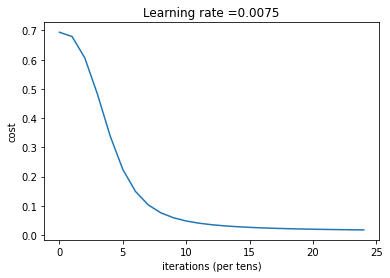

In [22]:
parameters = two_layer_model(X_train_flatten, Y_train, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [42]:
 def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    
    # Implement [LINEAR -> RELU]*(L-1).
    # Store A to A_prev, 
    # calculate A, Cache for relu activation 
    # Add "cache" to the "caches" list.
    for l in range(1, L):
        ### START CODE HERE ###
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
        ### END CODE HERE ###
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    ### START CODE HERE ###
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    ### END CODE HERE ###
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [43]:
 def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [44]:
predictions_train = predict(X_train_flatten, Y_train, parameters)

Accuracy: 0.9921875


In [45]:
predictions_test = predict(X_test_flatten, Y_test, parameters)

Accuracy: 0.71875


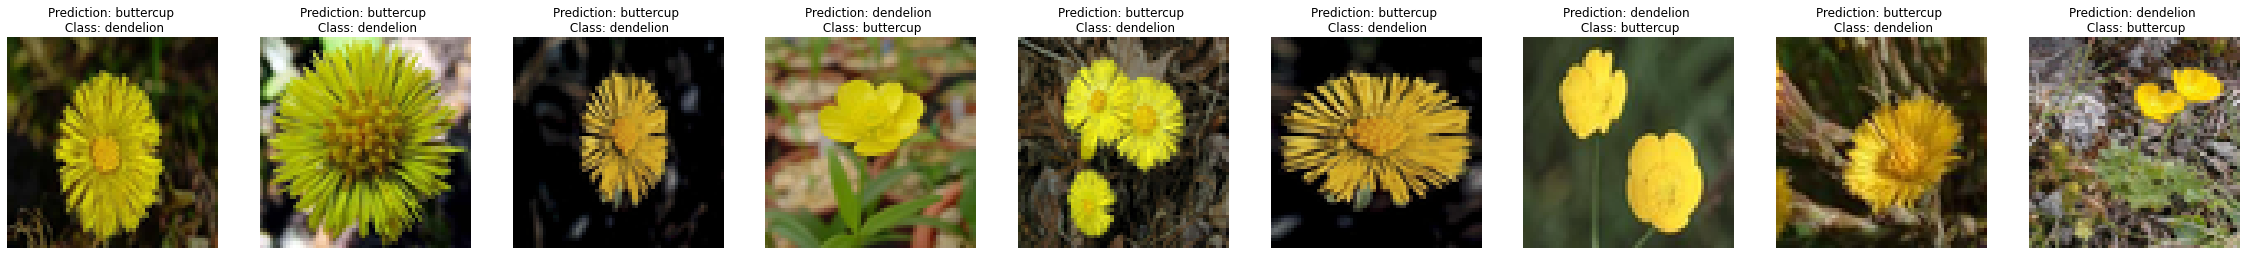

In [56]:
print_mislabeled_images(classes, X_test_flatten, Y_test, predictions_test)

## 5 - L-layer Neural Network

**Consigne**: Utiliser les fonctions qu'on a implémentées précédemment pour construire un réseau de neurones à $L$ couches avec la structure suivante *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. Les fonctions dont vous aurez besoin sont les suivantes :
```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

### Helper functions

In [47]:
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [48]:
def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost


In [49]:
def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [50]:
def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [51]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 8, 1] #  5-layer model

In [52]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Entraînons maintenant le modèle pour un réseau à 5 couches :
- Exécuter la cellule ci-dessous. Le coût doit décroitre à achaque itération. L'entrainement des 25 itérations peut prendre jusqu'à 5 minutes. 

Cost after iteration 0: 0.692701
Cost after iteration 100: 0.484573
Cost after iteration 200: 0.361089
Cost after iteration 300: 0.138118
Cost after iteration 400: 0.058057
Cost after iteration 500: 0.035682
Cost after iteration 600: 0.026226
Cost after iteration 700: 0.021449
Cost after iteration 800: 0.018700
Cost after iteration 900: 0.016964
Cost after iteration 1000: 0.015791
Cost after iteration 1100: 0.014955
Cost after iteration 1200: 0.014336
Cost after iteration 1300: 0.013862
Cost after iteration 1400: 0.013489
Cost after iteration 1500: 0.013190
Cost after iteration 1600: 0.012945
Cost after iteration 1700: 0.012742
Cost after iteration 1800: 0.012571
Cost after iteration 1900: 0.012426
Cost after iteration 2000: 0.012300
Cost after iteration 2100: 0.012191
Cost after iteration 2200: 0.012096
Cost after iteration 2300: 0.012011
Cost after iteration 2400: 0.011936


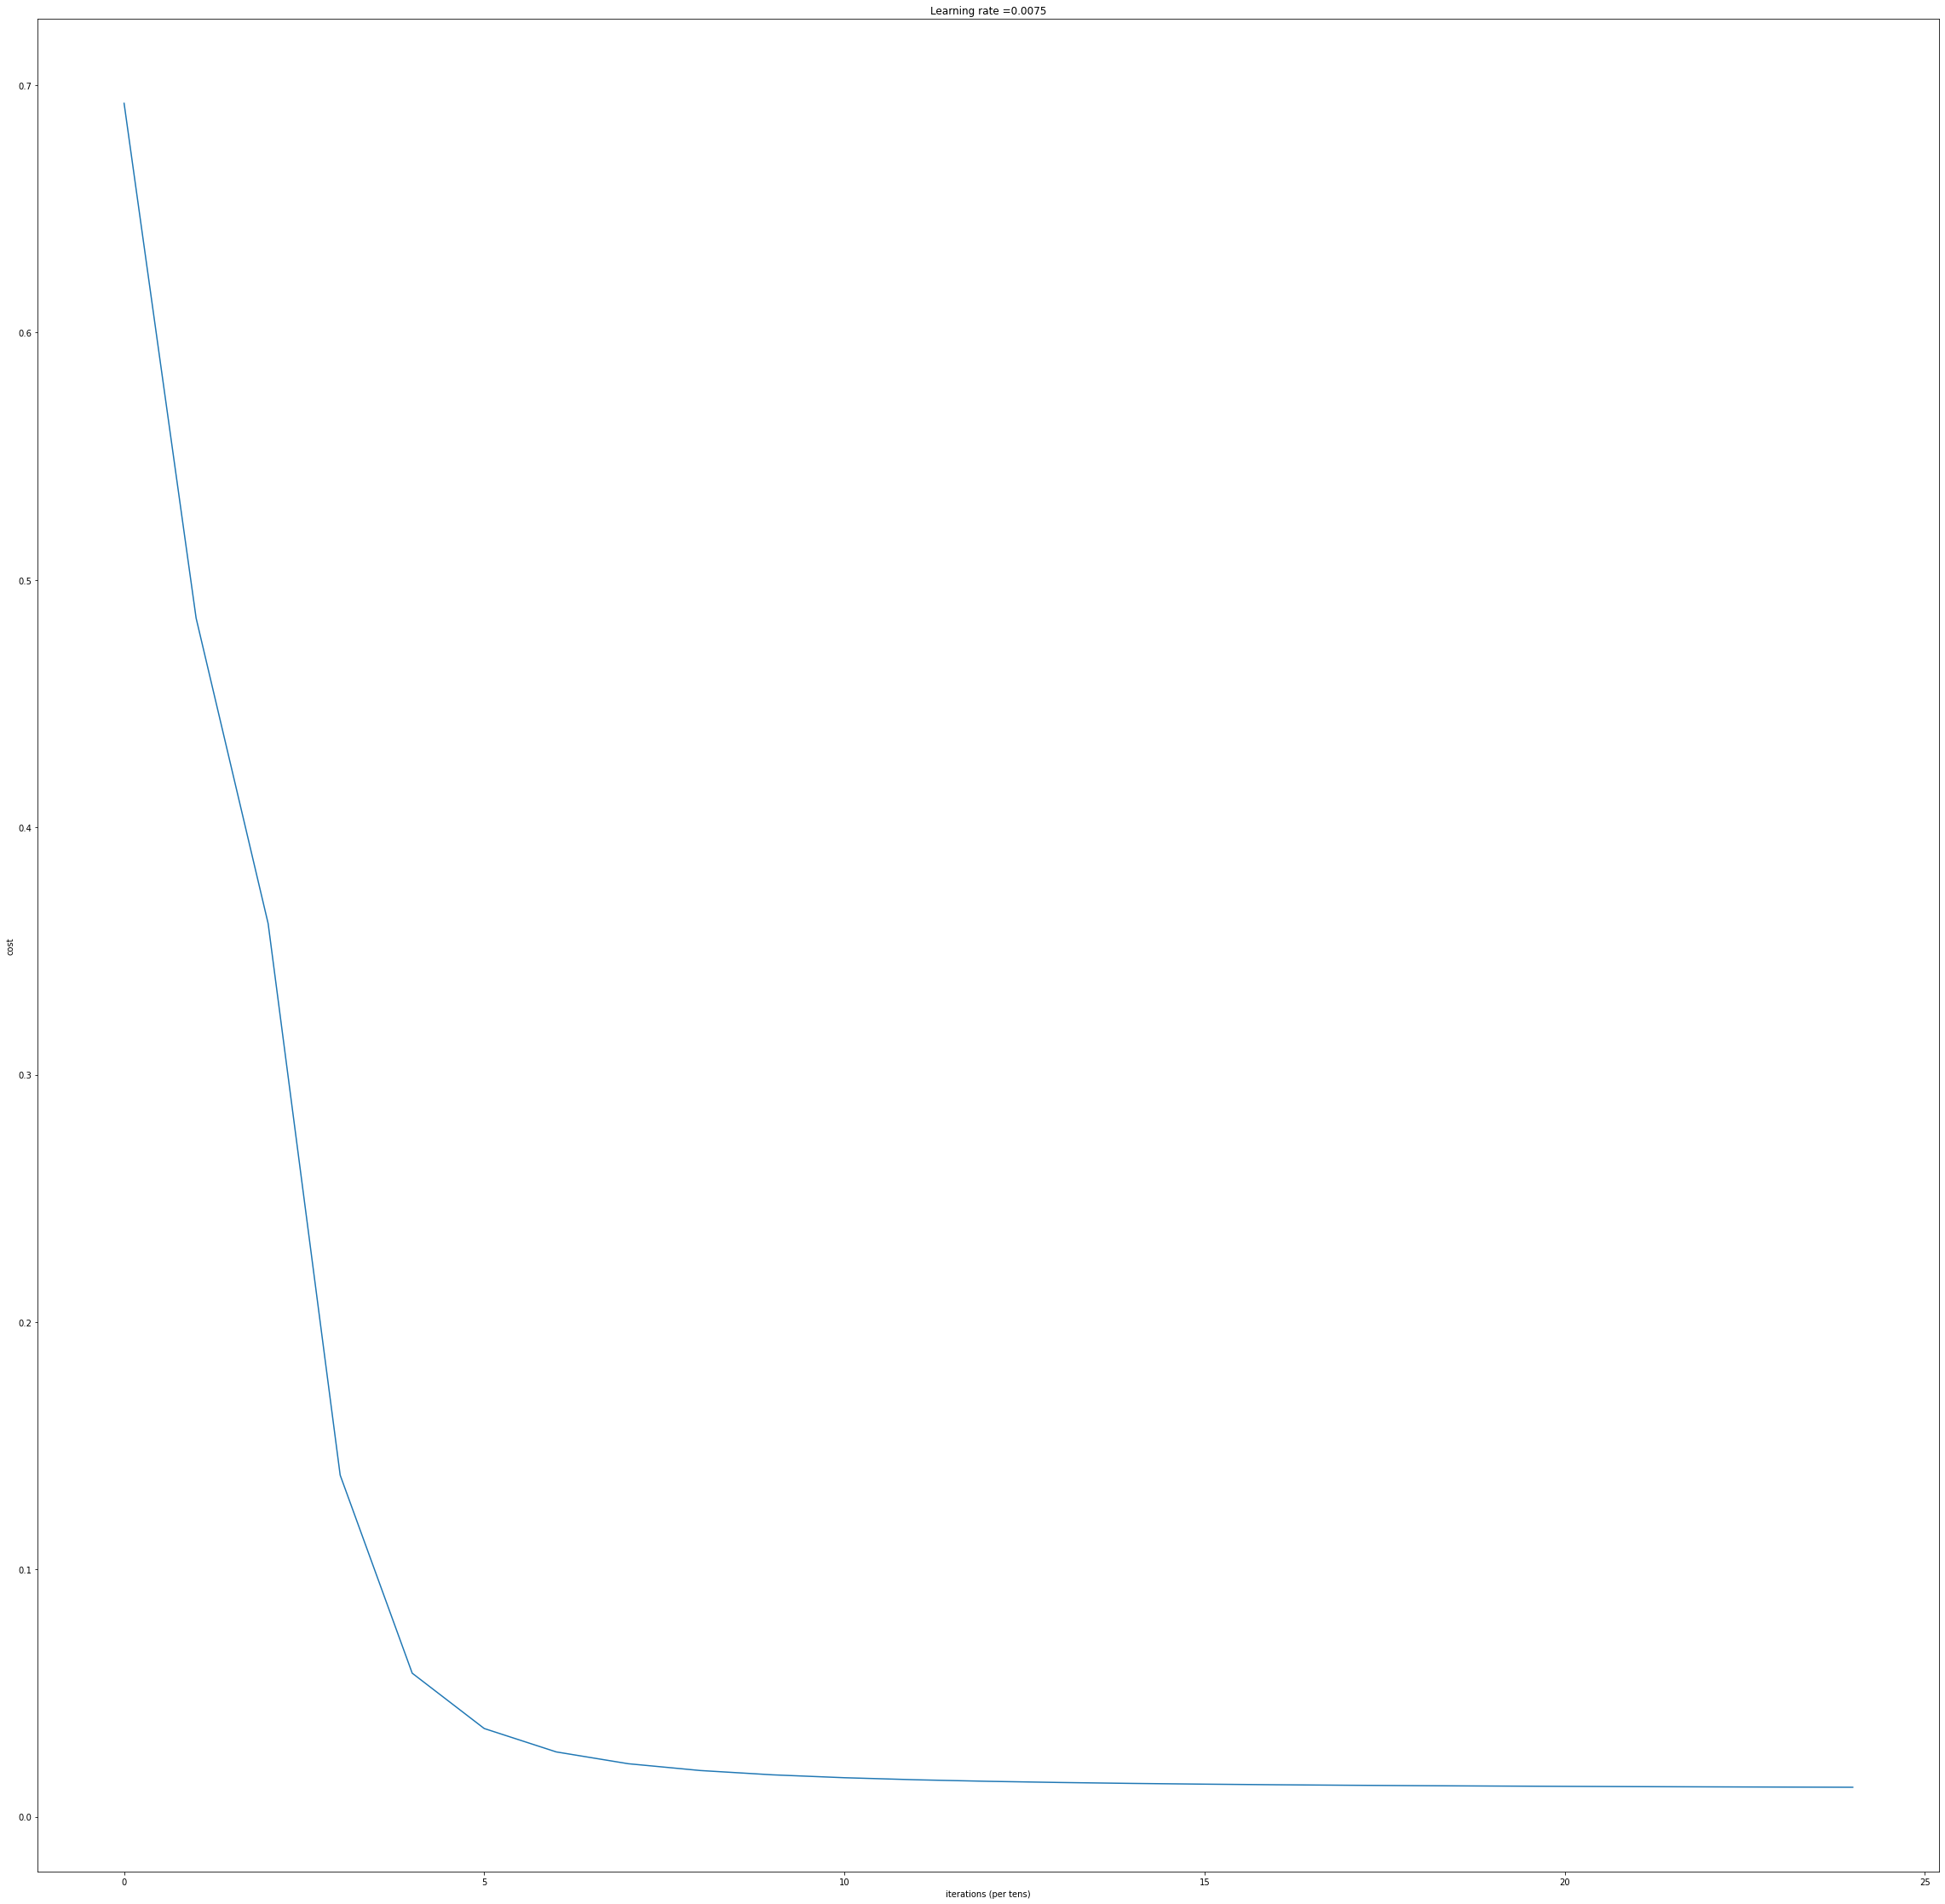

In [53]:
parameters = L_layer_model(X_train_flatten, Y_train, layers_dims, num_iterations = 2500, print_cost = True)

In [55]:
pred_train = predict(X_train_flatten, Y_train, parameters)

Accuracy: 0.9921875


In [57]:
pred_test = predict(X_test_flatten, Y_test, parameters)

Accuracy: 0.6875


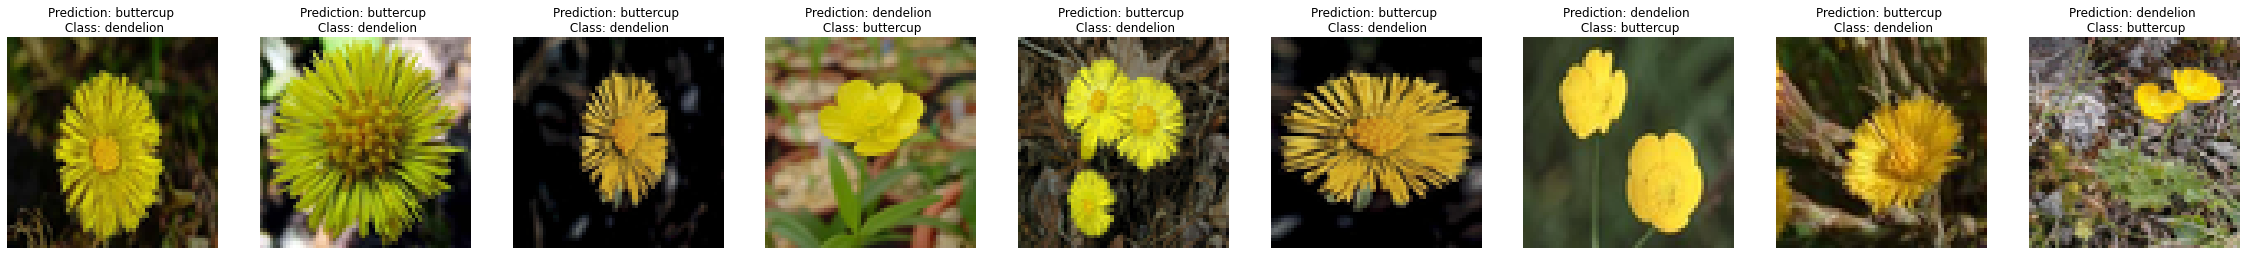

In [58]:
print_mislabeled_images(classes, X_test_flatten, Y_test, predictions_test)

In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test[0],pred_test[0])

0.6875